In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Diabetes prediction using Logistic regression

In [3]:
df=pd.read_csv("diabetes.csv")

In [4]:
df['Outcome']=df['Outcome'].replace({1:'yes',0:'no'})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,yes
1,1,85,66,29,0,26.6,0.351,31,no
2,8,183,64,0,0,23.3,0.672,32,yes
3,1,89,66,23,94,28.1,0.167,21,no
4,0,137,40,35,168,43.1,2.288,33,yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.shape

(768, 9)

<Axes: xlabel='SkinThickness'>

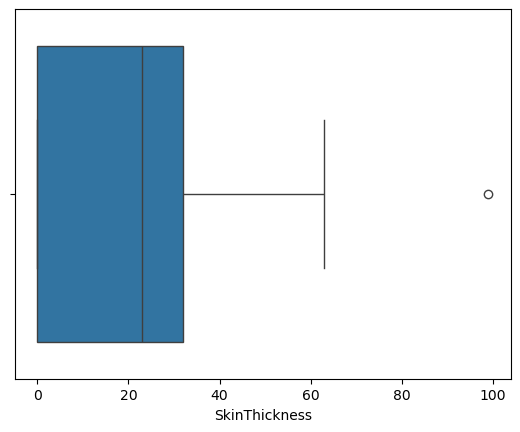

In [9]:
sns.boxplot(x=df['SkinThickness'],data=df)

<Axes: xlabel='Glucose'>

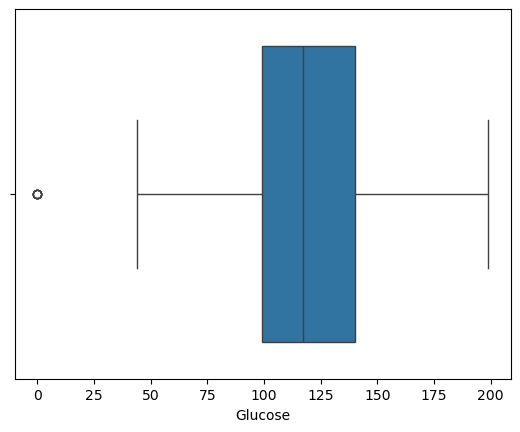

In [10]:
sns.boxplot(x=df['Glucose'],data=df)

In [11]:
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())

In [12]:
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())

<Axes: xlabel='Outcome', ylabel='count'>

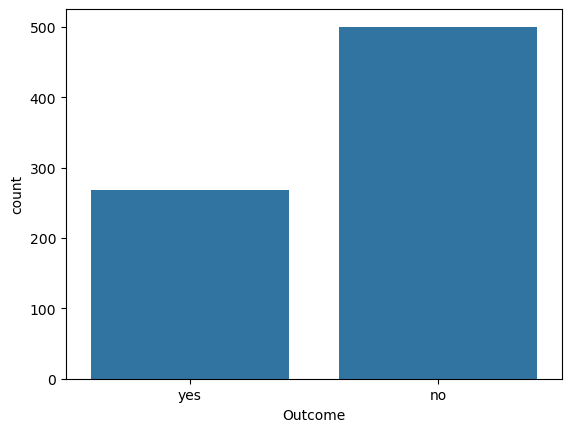

In [13]:
sns.countplot(x='Outcome',data=df)

In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,yes
1,1,85,66,29.000000,79.799479,26.6,0.351,31,no
2,8,183,64,20.536458,79.799479,23.3,0.672,32,yes
3,1,89,66,23.000000,94.000000,28.1,0.167,21,no
4,0,137,40,35.000000,168.000000,43.1,2.288,33,yes


In [15]:
num=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[num]=scaler.fit_transform(df[num])

In [17]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.872057,-0.417768,0.204013,0.468492,1.425995,yes
1,-0.844885,-1.123396,-0.160546,0.248678,-0.417768,-0.684422,-0.365061,-0.190672,no
2,1.233880,1.943724,-0.263941,-0.630654,-0.417768,-1.103255,0.604397,-0.105584,yes
3,-0.844885,-0.998208,-0.160546,-0.374700,-0.265107,-0.494043,-0.920763,-1.041549,no
4,-1.141852,0.504055,-1.504687,0.872057,0.530423,1.409746,5.484909,-0.020496,yes


In [18]:
data=df[['Age','Outcome']]
df=df.drop(['Outcome'],axis=1)

In [38]:
#remove outliers
from sklearn.preprocessing import QuantileTransformer
quatile=QuantileTransformer()
new_data=df
new_data=quatile.fit_transform(new_data)
#new_data=quatile.transform(new_data)
new_data=pd.DataFrame(new_data)
new_data.columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
new_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.747718,0.810300,0.516949,0.801825,0.380052,0.591265,0.750978,0.889831
1,0.232725,0.097784,0.336375,0.644720,0.380052,0.227510,0.475880,0.558670
2,0.863755,0.956975,0.279009,0.308996,0.380052,0.091917,0.782269,0.585398
3,0.232725,0.131030,0.336375,0.505867,0.662973,0.298566,0.106258,0.000000
4,0.000000,0.721643,0.050847,0.801825,0.834420,0.926988,0.997392,0.606258


In [20]:
X=df
y=data['Outcome']

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif[ 'VIF' ] = [variance_inflation_factor(X_train.values, i)for i in range(X_train.shape[1])]
vif[ 'VIF' ] = round(vif[ 'VIF' ], 2)
vif[ 'Features' ] = X_train.columns
vif = vif.sort_values(by= 'VIF' , ascending= False )
vif

,VIF,Features
5,1.52,BMI
7,1.50,Age
3,1.39,SkinThickness
0,1.37,Pregnancies
1,1.32,Glucose
4,1.23,Insulin
2,1.17,BloodPressure
6,1.07,DiabetesPedigreeFunction


In [23]:
X_train.shape

(614, 8)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
log=LogisticRegression()

In [26]:
log.fit(X_train,y_train)

LogisticRegression()

In [42]:
# Feature selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logreg = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=logreg, n_features_to_select=13)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Pregnancies', True, 1),
 ('Glucose', True, 1),
 ('BloodPressure', True, 1),
 ('SkinThickness', True, 1),
 ('Insulin', True, 1),
 ('BMI', True, 1),
 ('DiabetesPedigreeFunction', True, 1),
 ('Age', True, 1)]

In [40]:
y_pred=log.predict(X_test)
y_pred

array(['yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'y

In [28]:
f1=pd.DataFrame(y_test)
f1.head()

,Outcome
370,yes
388,yes
611,yes
550,no
232,no


In [29]:
f2=pd.DataFrame(y_pred)
f2.head()

,0
0,yes
1,no
2,yes
3,no
4,no


In [30]:
from sklearn.metrics import confusion_matrix ,classification_report,accuracy_score

In [31]:
train_pred=log.predict(X_train)
test_pred=log.predict(X_test)

In [32]:
accuracy_score(y_train,train_pred)

0.7768729641693811

In [33]:
accuracy_score(y_test,test_pred)

0.7662337662337663

In [34]:
cm=confusion_matrix(y_test,test_pred)

In [35]:
cm

array([[86,  9],
       [27, 32]], dtype=int64)

In [36]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

          no       0.76      0.91      0.83        95
         yes       0.78      0.54      0.64        59

    accuracy                           0.77       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154

